In [245]:
# insert Libreries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.naive_bayes import GaussianNB

In [246]:
 #conda install -c anaconda py-xgboost

In [247]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [248]:
Df_train= pd.read_csv(r'C:\Users\zsoltani\Desktop\Zohreh Training and Personal files\Python class\Chapter 18\House Price-CapstoneII\\train.csv')

In [249]:
#Part 1: Exploratory Data Analysis

In [250]:
Df_train.shape

(1460, 81)

In [251]:
# to sdeperate numerical and categorical columns

categorical = Df_train.dtypes[Df_train.dtypes == 'object'].index.tolist()
numerical = Df_train.dtypes[Df_train.dtypes != 'object'].index.tolist()

print('Categorical variables are:\n\n', categorical,'\n\nNumerical variables are:\n\n',numerical)

Categorical variables are:

 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

Numerical variables are:

 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 

In [252]:
print('No. of categorical variables:', len(categorical), ' ,  No. of numerical variables:', len(numerical))

No. of categorical variables: 43  ,  No. of numerical variables: 38


In [253]:
# Exploring the Categorical Data
# according to the result some features like Neighborhoods have as much as 25 Categories!

Df_train[categorical].describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [254]:
# based on the data some features "(i.e. "Street", "RoofMatl", "Heating", "GarageQual", and "GarageCond") have a dominant category so they cannot have much explanatory power. 

In [255]:
# Exploring the Numerical Data

Df_train[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [256]:
# DO I need to discard freature with 75%=0 ? Like Porch related features

In [257]:
# exploring the type of data
Df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [258]:
#The target variable : Distribution of SalePrice

[Text(0.5, 0, '')]

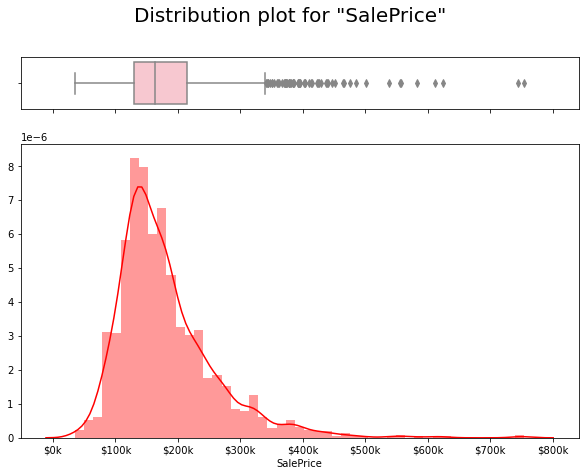

In [259]:
import matplotlib.ticker as tck

def currency(x,pos):
    if x >= 10**6 :
        return '${:1.2f}M'.format(x*1e-6)
    return '${:1.0f}k'.format(x*1e-3)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    figsize=(10,7), gridspec_kw={"height_ratios": (.15, .85)})
plt.suptitle('Distribution plot for "SalePrice"', fontsize = 20)
formater = tck.FuncFormatter(currency)
ax_hist.xaxis.set_major_formatter(formater)
sns.boxplot(Df_train['SalePrice'], ax= ax_box, color='pink')
sns.distplot(Df_train['SalePrice'], ax= ax_hist, color='red' )
ax_box.set(xlabel='')

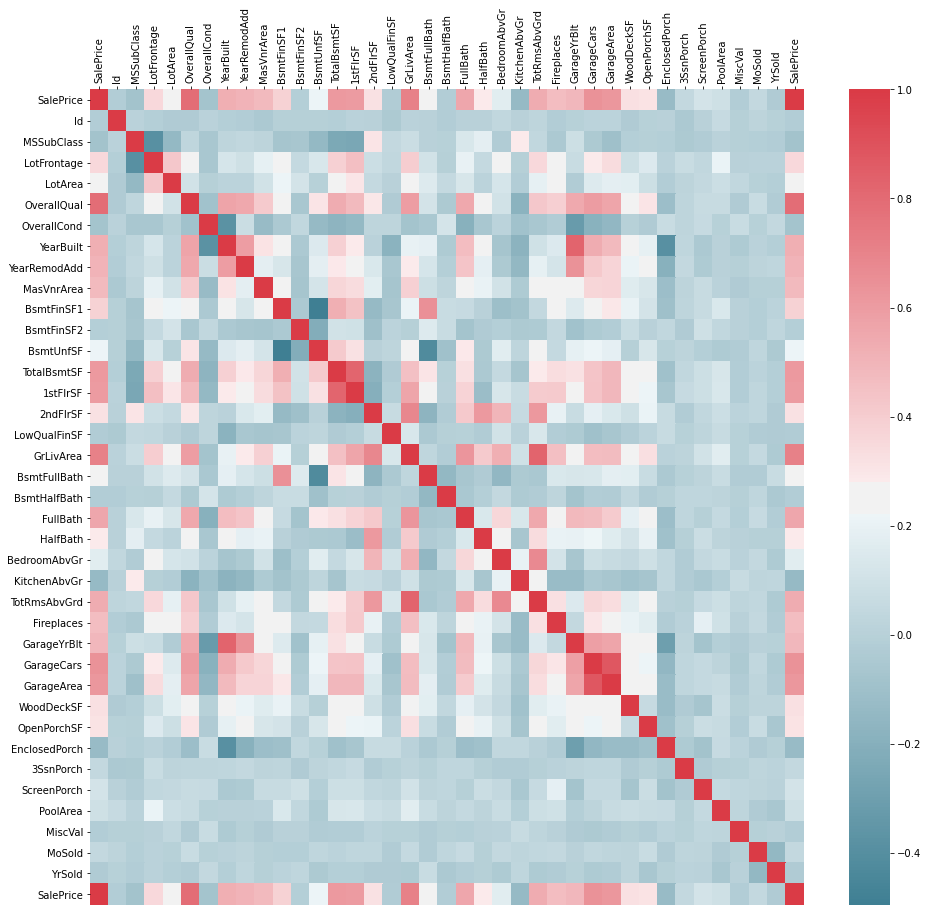

In [260]:

# Using corrolation we can find the features which are staorngly corrolated to the Sale Price (- or +)
corr = Df_train[['SalePrice'] + numerical].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

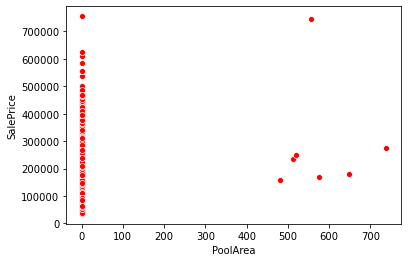

In [261]:
#none of the belwo features have strong corrolation with Sale Price 
sns.scatterplot(x=Df_train['PoolArea'], y=Df_train['SalePrice'], color='red')


<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

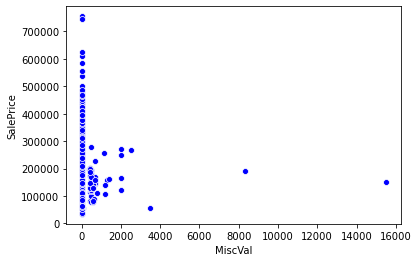

In [262]:

sns.scatterplot(x=Df_train['MiscVal'], y=Df_train['SalePrice'], color='blue')


<AxesSubplot:xlabel='ScreenPorch', ylabel='SalePrice'>

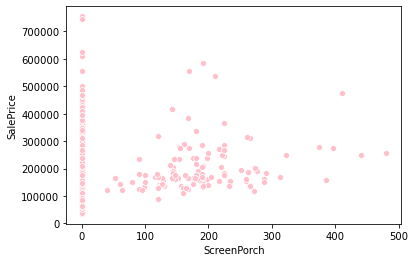

In [263]:

sns.scatterplot(x=Df_train['ScreenPorch'], y=Df_train['SalePrice'], color='pink')

In [264]:
Df_train.shape

(1460, 81)

In [265]:
print('"SalePrice" kurosis = ', np.round(Df_train['SalePrice'].kurtosis(),2),
     '\n"SalePrice" skewness = ', np.round(Df_train['SalePrice'].skew(),2))

#Accordimg to the result Sale price is Right skewed and havy-tailed. Min an dMax are normal so I onot see any error in the sale price which is my target variable

"SalePrice" kurosis =  6.54 
"SalePrice" skewness =  1.88


In [266]:
#if dataset contains missing values.

Df_train.isna().sum().sum()

6965

In [267]:
Df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [268]:
#First we create a list of missing values by each feature
temp = list(Df_train.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i=0
for col in Df_train.columns:
    if temp[i]!=0:
        insert_lst = [col,temp[i]]
        lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

print(temp_df)

     Column_Name  Missing_Values
0    LotFrontage             259
1          Alley            1369
2     MasVnrType               8
3     MasVnrArea               8
4       BsmtQual              37
5       BsmtCond              37
6   BsmtExposure              38
7   BsmtFinType1              37
8   BsmtFinType2              38
9     Electrical               1
10   FireplaceQu             690
11    GarageType              81
12   GarageYrBlt              81
13  GarageFinish              81
14    GarageQual              81
15    GarageCond              81
16        PoolQC            1453
17         Fence            1179
18   MiscFeature            1406


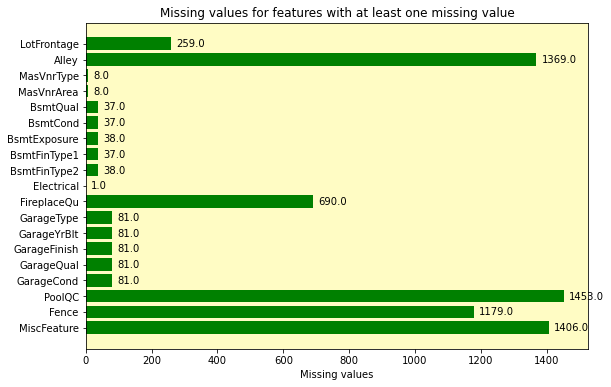

In [269]:
# graphi9cally presenting the missing value

fig, ax = plt.subplots()

ax.barh(temp_df.Column_Name, temp_df.Missing_Values,  align='center', color='Green')
ax.set_yticks(temp_df.Column_Name)
ax.set_yticklabels(temp_df.Column_Name)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Missing values')
ax.set_title('Missing values for features with at least one missing value')

N = 1.5
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N, plSize[1]*N) )

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.
ax.set_facecolor('xkcd:egg shell')

plt.show()

In [270]:

Df_train.shape


(1460, 81)

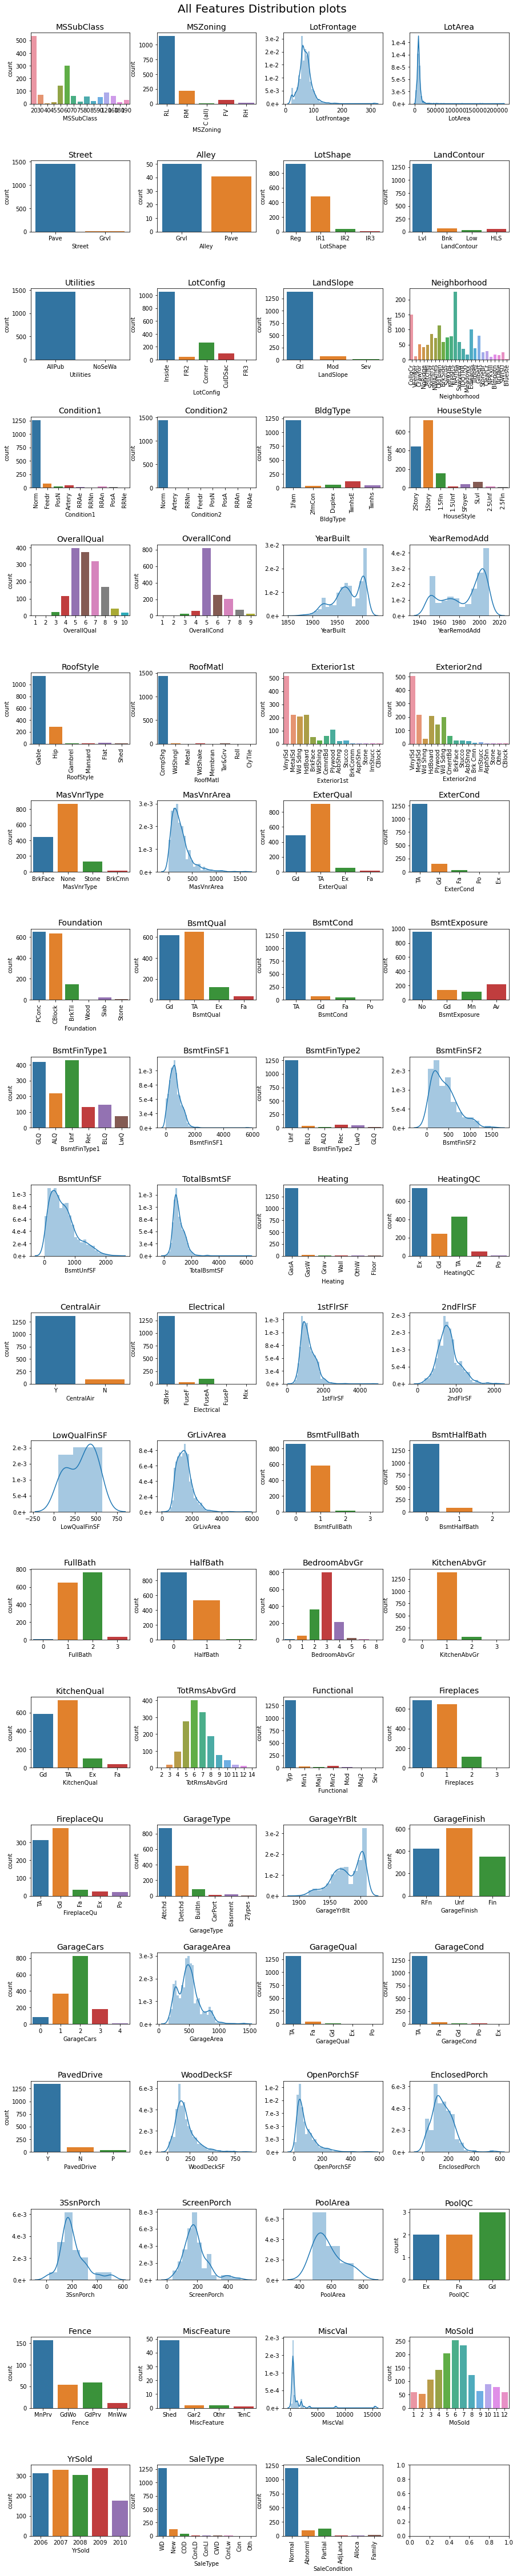

In [271]:
int_as_float = ['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolArea', 'MiscVal',"YearBuilt", "YearRemodAdd"]
allcolumns = np.array(Df_train.columns.drop(['Id','SalePrice']).tolist()+[None]).reshape(20, 4)
fig, ax = plt.subplots(figsize=(15, 70), ncols=4, nrows=20)
fig.suptitle('All Features Distribution plots', fontsize=20)
plt.subplots_adjust(
    left=0.125,
    right=0.9,
    bottom=0.1,
    top=0.97,
    wspace=0.275,
    hspace= 0.8)

prob_formater = tck.FuncFormatter(
    lambda x, p: np.format_float_scientific(x, precision=0, exp_digits=0))

for i in range(20):
    for j in range(4):
        if i == 19 and j == 3:
            continue
        ax[i][j].set_title(allcolumns[i][j], fontsize=14)
        for tick in ax[i][j].get_xticklabels():
            if Df_train[allcolumns[i][j]].nunique() >= 5 and Df_train[allcolumns[i][j]].dtype == 'object':
                tick.set_rotation(90)
        if ( Df_train[allcolumns[i][j]].dtypes == 'float64') | (allcolumns[i][j] in int_as_float):
            ax[i][j].yaxis.set_major_formatter(prob_formater)
            sns.distplot( Df_train.loc[( Df_train[allcolumns[i][j]]!= 0), 
                                      allcolumns[i][j]], ax=ax[i, j], kde=True)
        else:
            sns.countplot( Df_train[allcolumns[i][j]], ax=ax[i, j])



In [272]:

#Calculate the Skewness of the Numerical features

for col in numerical:
    print('{:15}'.format(col), 
          'Skewness:{:05.2f} '.format(Df_train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(Df_train[col].kurt())  
         )

Id              Skewness:00.00      Kurtosis: -01.20
MSSubClass      Skewness:01.41      Kurtosis: 001.58
LotFrontage     Skewness:02.16      Kurtosis: 017.45
LotArea         Skewness:12.21      Kurtosis: 203.24
OverallQual     Skewness:00.22      Kurtosis: 000.10
OverallCond     Skewness:00.69      Kurtosis: 001.11
YearBuilt       Skewness:-0.61      Kurtosis: -00.44
YearRemodAdd    Skewness:-0.50      Kurtosis: -01.27
MasVnrArea      Skewness:02.67      Kurtosis: 010.08
BsmtFinSF1      Skewness:01.69      Kurtosis: 011.12
BsmtFinSF2      Skewness:04.26      Kurtosis: 020.11
BsmtUnfSF       Skewness:00.92      Kurtosis: 000.47
TotalBsmtSF     Skewness:01.52      Kurtosis: 013.25
1stFlrSF        Skewness:01.38      Kurtosis: 005.75
2ndFlrSF        Skewness:00.81      Kurtosis: -00.55
LowQualFinSF    Skewness:09.01      Kurtosis: 083.23
GrLivArea       Skewness:01.37      Kurtosis: 004.90
BsmtFullBath    Skewness:00.60      Kurtosis: -00.84
BsmtHalfBath    Skewness:04.10      Kurtosis: 

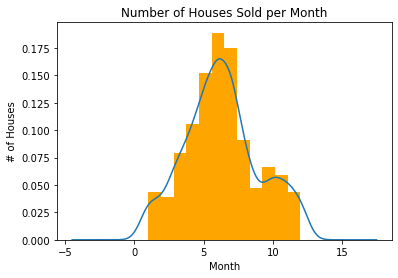

In [276]:
# exploring the number of houses sold in each month
fig, ax = plt.subplots(figsize = (6,4))
Df_train['MoSold'].plot(kind='hist',histtype='bar', density = True, bins = 12, color='orange')
Df_train['MoSold'].plot(kind='kde')
# X #
ax.set_xlabel("Month")
# Y #
ax.set_ylabel("# of Houses")
# Title #
ax.set_title("Number of Houses Sold per Month")
plt.show()

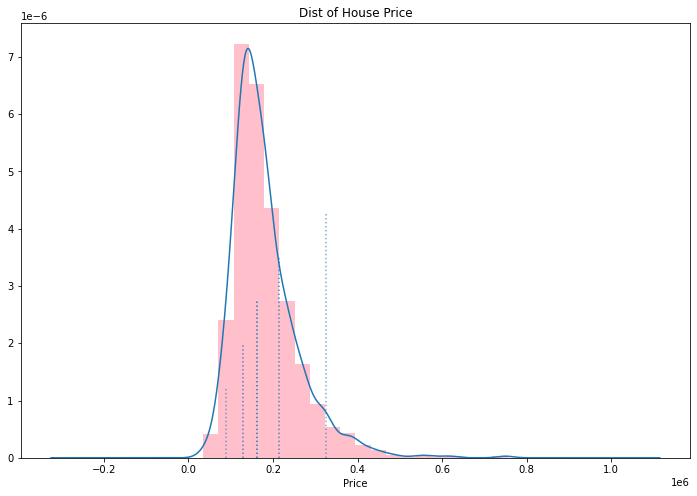

In [277]:


fig, ax = plt.subplots(figsize = (12,8))

Df_train['SalePrice'].plot(kind='hist', histtype='bar', density = True, bins = 20, color='pink')
Df_train['SalePrice'].plot(kind='kde')
   
# X #
ax.set_xlabel("Price")
 
ax.set_ylabel("")

# Title #
ax.set_title('Dist of House Price')
   
# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = Df_train['SalePrice'].quantile(0.05), Df_train['SalePrice'].quantile(0.25), Df_train['SalePrice'].quantile(0.5), Df_train['SalePrice'].quantile(0.75), Df_train['SalePrice'].quantile(0.95)

# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")

 
plt.show()

biggest Lot is: 4.941 acres
smallest Lot is: 1,300.000 SQF
Average Lot is: 0.241 acres


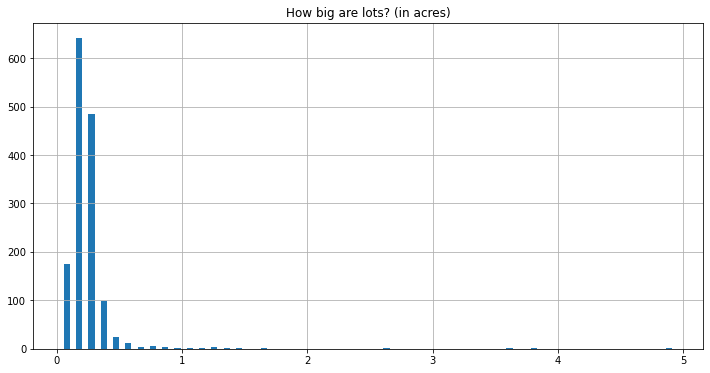

In [278]:
# Exploring the lot sizes
sqft_to_acres = 43560

print( 'biggest Lot is: {:,.3f} acres'.format(Df_train['LotArea'].max()/sqft_to_acres))
print( 'smallest Lot is: {:,.3f} SQF'.format(Df_train['LotArea'].min()))
print( 'Average Lot is: {:,.3f} acres'.format(Df_train['LotArea'].mean()/sqft_to_acres))

(Df_train['LotArea']/43560).hist(bins=50, rwidth=.5, figsize=(12,6))
plt.title('How big are lots? (in acres)')
plt.show()

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

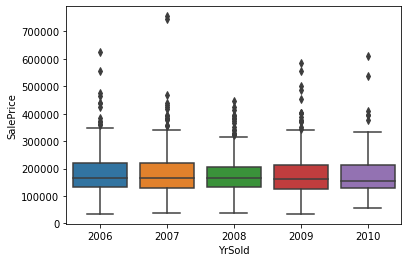

In [279]:
sns.boxplot(x=Df_train['YrSold'], y=Df_train['SalePrice'])

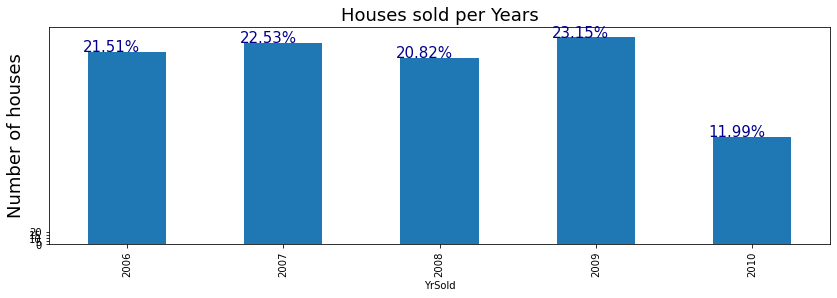

In [280]:
# according to the belwo histograms and the box plot it seems Ames wasnot impacted by the Ecoomy crisis in 2008

ax=Df_train.groupby(['YrSold']).Id.count().plot(kind='bar', figsize=(14,4))
ax.set_alpha(0.8)
ax.set_title('Houses sold per Years', fontsize=18)
ax.set_ylabel("Number of houses", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.05, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='darkblue', ha='left')



plt.show()



<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

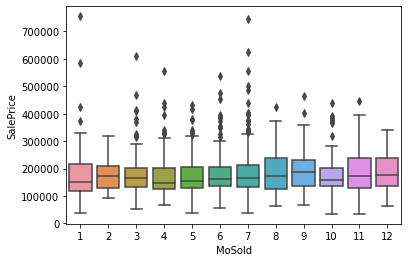

In [281]:
sns.boxplot(x=Df_train['MoSold'], y=Df_train['SalePrice'])

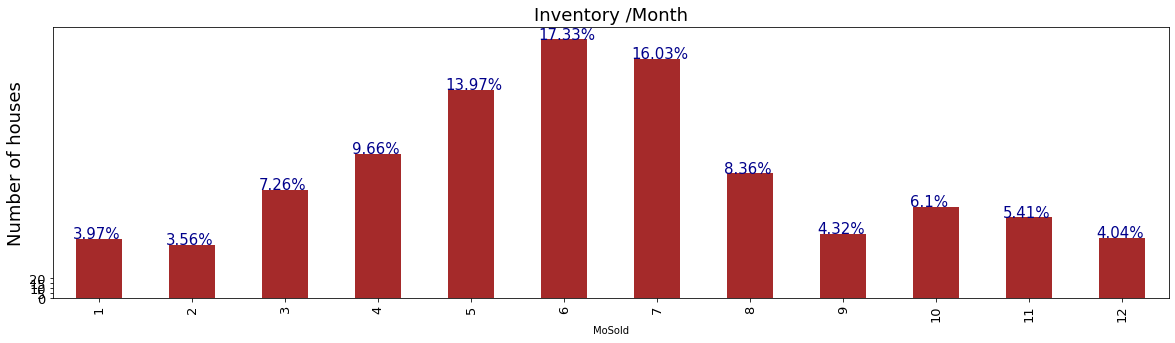

In [282]:

# below bars graphs indictate seasonality in the house market in Ames
ax=Df_train.groupby(['MoSold']).Id.count().plot(kind='bar', figsize=(20,5), color="brown",fontsize=13)

ax.set_alpha(0.8)
ax.set_title("Inventory /Month", fontsize=18)
ax.set_ylabel("Number of houses", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='darkblue')

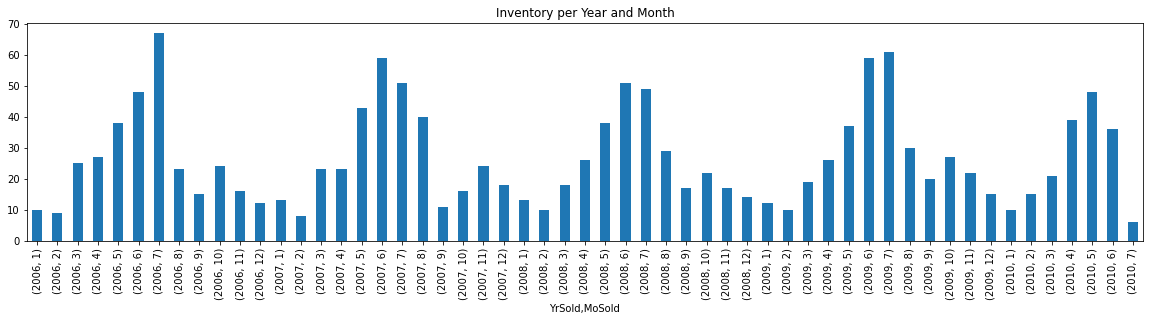

In [283]:
# below Plot show a patternof seasonality

Df_train.groupby([ 'YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(20,4))
plt.title('Inventory per Year and Month')
plt.show()

In [284]:
# Replacing Nans with Zero

Df_train=Df_train.fillna(0)

In [285]:
# check to ensure we have no Nan values left in the data frame

colsII=Df_train.columns

nansII=[]

for col in colsII:
    nansII.append(Df_train[col].isnull().sum())
    
print (nansII)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [286]:
for col in categorical:
    print (col,':', len (Df_train[col].unique()),':', Df_train[col].unique())
    

MSZoning : 5 : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : 2 : ['Pave' 'Grvl']
Alley : 3 : [0 'Grvl' 'Pave']
LotShape : 4 : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : 4 : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : 2 : ['AllPub' 'NoSeWa']
LotConfig : 5 : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : 3 : ['Gtl' 'Mod' 'Sev']
Neighborhood : 25 : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : 9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : 8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : 5 : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : 8 : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : 6 : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : 8 : ['CompShg' 'WdShngl' 

In [287]:
#1.Zoning

MSZoningII=Df_train['MSZoning'].unique()
count=1
Rep={}
for data in MSZoningII:
    Rep[data]=count
    count+=1

Df_train['MSZoning']=Df_train['MSZoning'].replace(Rep)

#2.Street
StreetII=Df_train['Street'].unique()
count=1
Rep={}
for data in StreetII:
    Rep[data]=count
    count+=1

Df_train['Street']=Df_train['Street'].replace(Rep)

#3.Lot Shape
LotShapeII=Df_train['LotShape'].unique()
count=1
Rep={}
for data in LotShapeII:
    Rep[data]=count
    count+=1

Df_train['LotShape']=Df_train['LotShape'].replace(Rep)

#4.LandContour
LandContourII=Df_train['LandContour'].unique()
count=1
Rep={}
for data in LandContourII:
    Rep[data]=count
    count+=1

Df_train['LandContour']=Df_train['LandContour'].replace(Rep)

#5.Lot Configuration

LotConfigII=Df_train['LotConfig'].unique()
count=1
Rep={}
for data in LotConfigII:
    Rep[data]=count
    count+=1

Df_train['LotConfig']=Df_train['LotConfig'].replace(Rep)


#6.Land Slope

LandSlopeII=Df_train['LandSlope'].unique()
count=1
Rep={}
for data in LandSlopeII:
    Rep[data]=count
    count+=1

Df_train['LandSlope']=Df_train['LandSlope'].replace(Rep)

#7.Building type
BldgTypeII=Df_train['BldgType'].unique()
count=1
Rep={}
for data in BldgTypeII:
    Rep[data]=count
    count+=1

Df_train['BldgType']=Df_train['BldgType'].replace(Rep)

#8.Neighborhood

NeighborhoodII=Df_train['Neighborhood'].unique()
count=1
Rep={}
for data in NeighborhoodII:
    Rep[data]=count
    count+=1

Df_train['Neighborhood']=Df_train['Neighborhood'].replace(Rep)

#9.House Style

HouseStyleII=Df_train['HouseStyle'].unique()
count=1
Rep={}
for data in HouseStyleII:
    Rep[data]=count
    count+=1

Df_train['HouseStyle']=Df_train['HouseStyle'].replace(Rep)


#10.Roof Material

RoofMatlII=Df_train['RoofMatl'].unique()
count=1
Rep={}
for data in RoofMatlII:
    Rep[data]=count
    count+=1

Df_train['RoofMatl']=Df_train['RoofMatl'].replace(Rep)


#13.Roof Style

RoofStyleII=Df_train['RoofStyle'].unique()
count=1
Rep={}
for data in RoofStyleII:
    Rep[data]=count
    count+=1

Df_train['RoofStyle']=Df_train['RoofStyle'].replace(Rep)

#14. MasVnr Type

MasVnrTypeII=Df_train['MasVnrType'].unique()
count=1
Rep={}
for data in MasVnrTypeII:
    Rep[data]=count
    count+=1

Df_train['MasVnrType']=Df_train['MasVnrType'].replace(Rep)

#15.Foundation
FoundationII=Df_train['Foundation'].unique()
count=1
Rep={}
for data in FoundationII:
    Rep[data]=count
    count+=1

Df_train['Foundation']=Df_train['Foundation'].replace(Rep)

#15.Bsmt Exposure

BsmtExposureII=Df_train['BsmtExposure'].unique()
count=1
Rep={}
for data in BsmtExposureII:
    Rep[data]=count
    count+=1

Df_train['BsmtExposure']=Df_train['BsmtExposure'].replace(Rep)

#16.Heating
HeatingII=Df_train['Heating'].unique()
count=1
Rep={}
for data in HeatingII:
    Rep[data]=count
    count+=1

Df_train['Heating']=Df_train['Heating'].replace(Rep)
#17.Heating QC
HeatingQC=Df_train['HeatingQC'].unique()
count=1
Rep={}
for data in HeatingQC:
    Rep[data]=count
    count+=1

Df_train['HeatingQC']=Df_train['HeatingQC'].replace(Rep)

#18.Electrical

Electrical=Df_train['Electrical'].unique()
count=1
Rep={}
for data in Electrical:
    Rep[data]=count
    count+=1

Df_train['Electrical']=Df_train['Electrical'].replace(Rep)

#19.Funcational

Functional=Df_train['Functional'].unique()
count=1
Rep={}
for data in Functional:
    Rep[data]=count
    count+=1

Df_train['Functional']=Df_train['Functional'].replace(Rep)

#20. Garage Type
GarageType=Df_train['GarageType'].unique()
count=1
Rep={}
for data in GarageType:
    Rep[data]=count
    count+=1

Df_train['GarageType']=Df_train['GarageType'].replace(Rep)

#21. Sale Type
SaleType=Df_train['SaleType'].unique()
count=1
Rep={}
for data in SaleType:
    Rep[data]=count
    count+=1

Df_train['SaleType']=Df_train['SaleType'].replace(Rep)

#22. Sale Condition
SaleCondition=Df_train['SaleCondition'].unique()
count=1
Rep={}
for data in SaleCondition:
    Rep[data]=count
    count+=1

Df_train['SaleCondition']=Df_train['SaleCondition'].replace(Rep)


#23.Utilities
Utilities=Df_train['Utilities'].unique()
count=1
Rep={}
for data in Utilities:
    Rep[data]=count
    count+=1

Df_train['Utilities']=Df_train['Utilities'].replace(Rep)

#23.Alley
allies=Df_train['Alley'].unique()
count=1
Rep={}
for data in allies:
    Rep[data]=count
    count+=1

Df_train['Alley']=Df_train['Alley'].replace(Rep)


In [288]:
for col in categorical:
    print (col,':', len (Df_train[col].unique()),':', Df_train[col].unique())
    

MSZoning : 5 : [1 2 3 4 5]
Street : 2 : [1 2]
Alley : 3 : [1 2 3]
LotShape : 4 : [1 2 3 4]
LandContour : 4 : [1 2 3 4]
Utilities : 2 : [1 2]
LotConfig : 5 : [1 2 3 4 5]
LandSlope : 3 : [1 2 3]
Neighborhood : 25 : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Condition1 : 9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : 8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : 5 : [1 2 3 4 5]
HouseStyle : 8 : [1 2 3 4 5 6 7 8]
RoofStyle : 6 : [1 2 3 4 5 6]
RoofMatl : 8 : [1 2 3 4 5 6 7 8]
Exterior1st : 15 : ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd : 16 : ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
MasVnrType : 5 : [1 2 3 4 5]
ExterQual : 4 : ['Gd' 'TA' 'Ex' 'Fa']
ExterCon

In [289]:

Df_train['GarageQual']=Df_train['GarageQual'].astype(object)
Df_train['FireplaceQu']=Df_train['FireplaceQu'].astype(object)
Df_train['GarageCond']=Df_train['GarageCond'].astype(object)
Df_train['PoolQC']=Df_train['PoolQC'].astype(object)
Df_train['KitchenQual']=Df_train.KitchenQual.astype(object)
Df_train['KitchenQual']=Df_train.KitchenQual.astype(object)
Df_train['BsmtFinType1']=Df_train.BsmtFinType1.astype(object)
Df_train['BsmtFinType2']=Df_train.BsmtFinType2.astype(object)
Df_train['Condition1']=Df_train.Condition1.astype(object)
Df_train['Condition2']=Df_train.Condition2.astype(object)
Rep3={'TA':2,'Gd':4, 'Fa':3, 'Ex':5 ,'Po':1}
Rep4={'GLQ':6, 'ALQ':5,'Unf':1 ,'Rec':4, 'BLQ':3, 'LwQ':2}
Rep5={'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8, 'RRNe':9}
#fireplace
Df_train['FireplaceQu']=Df_train['FireplaceQu'].replace(Rep3)
#Guarage
Df_train['GarageQual']=Df_train['GarageQual'].replace(Rep3)
Df_train['GarageCond']=Df_train['GarageCond'].replace(Rep3)
#Pool
Df_train['PoolQC']=Df_train['PoolQC'].replace(Rep3)
#Kitchen
Df_train['KitchenQual']=Df_train['KitchenQual'].replace(Rep3)
#BsmtFin
Df_train['BsmtFinType1']=Df_train['BsmtFinType1'].replace(Rep4)
Df_train['BsmtFinType2']=Df_train['BsmtFinType2'].replace(Rep4)

#Condition
Df_train['Condition1']=Df_train['Condition1'].replace(Rep5)
Df_train['Condition2']=Df_train['Condition2'].replace(Rep5)

In [290]:
Df_train['ExterQual']=Df_train.ExterQual.astype(object)
Df_train['ExterQual']=Df_train['ExterQual'].replace(Rep3)
Df_train['ExterCond']=Df_train.ExterCond.astype(object)
Df_train['ExterCond']=Df_train['ExterCond'].replace(Rep3)
Df_train['BsmtCond']=Df_train['BsmtCond'].astype(object)
Df_train['BsmtCond']=Df_train['BsmtCond'].replace(Rep3)
Df_train['BsmtQual']=Df_train['BsmtQual'].astype(object)
Df_train['BsmtQual']=Df_train['BsmtQual'].replace(Rep3)
Rep6={'VinylSd': 1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6 ,'CemntBd':7,
 'Plywood':8, 'AsbShng':9 ,'Stucco':10 ,'BrkComm':11 ,'AsphShn':12, 'Stone':13, 'ImStucc':14,
 'CBlock':15}
Rep7= {'VinylSd':1, 'MetalSd':2, 'Wd Shng':3, 'HdBoard':4, 'Plywood':8 ,'Wd Sdng':6, 'CmentBd':7,
 'BrkFace':5 ,'Stucco':10 ,'AsbShng':9 ,'Brk Cmn':11, 'ImStucc':14 ,'AsphShn':12 ,'Stone':13,
 'Other':16 ,'CBlock':15}
Df_train['Exterior1st']=Df_train['Exterior1st'].astype(object)
Df_train['Exterior1st']=Df_train['Exterior1st'].replace(Rep6)

Df_train['Exterior2nd']=Df_train['Exterior2nd'].astype(object)
Df_train['Exterior2nd']=Df_train['Exterior2nd'].replace(Rep7)

Rep8={'Y':1, 'N':0, 'P':0.5}
Df_train['PavedDrive']=Df_train['PavedDrive'].astype(object)
Df_train['PavedDrive']=Df_train['PavedDrive'].replace(Rep8)
Df_train['CentralAir']=Df_train['CentralAir'].astype(object)
Df_train['CentralAir']=Df_train['CentralAir'].replace(Rep8)
Rep9={'RFn':2 ,'Unf':1 ,'Fin':3}
Df_train['GarageFinish']=Df_train['GarageFinish'].astype(object)
Df_train['GarageFinish']=Df_train['GarageFinish'].replace(Rep9)


In [291]:
for col in categorical:
    print (col,':', len (Df_train[col].unique()),':', Df_train[col].unique())
    

MSZoning : 5 : [1 2 3 4 5]
Street : 2 : [1 2]
Alley : 3 : [1 2 3]
LotShape : 4 : [1 2 3 4]
LandContour : 4 : [1 2 3 4]
Utilities : 2 : [1 2]
LotConfig : 5 : [1 2 3 4 5]
LandSlope : 3 : [1 2 3]
Neighborhood : 25 : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Condition1 : 9 : [1 2 3 4 5 6 7 8 9]
Condition2 : 8 : [1 4 6 2 3 8 7 5]
BldgType : 5 : [1 2 3 4 5]
HouseStyle : 8 : [1 2 3 4 5 6 7 8]
RoofStyle : 6 : [1 2 3 4 5 6]
RoofMatl : 8 : [1 2 3 4 5 6 7 8]
Exterior1st : 15 : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Exterior2nd : 16 : [ 1  2  3  4  8  6  7  5 10  9 11 14 12 13 16 15]
MasVnrType : 5 : [1 2 3 4 5]
ExterQual : 4 : [4 2 5 3]
ExterCond : 5 : [2 4 3 1 5]
Foundation : 6 : [1 2 3 4 5 6]
BsmtQual : 5 : [4 2 5 0 3]
BsmtCond : 5 : [2 4 0 3 1]
BsmtExposure : 5 : [1 2 3 4 5]
BsmtFinType1 : 7 : [6 5 1 4 3 0 2]
BsmtFinType2 : 7 : [1 3 0 5 4 2 6]
Heating : 6 : [1 2 3 4 5 6]
HeatingQC : 5 : [1 2 3 4 5]
CentralAir : 2 : [1 0]
Electrical : 6 : [1 2 3 4 5 6

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

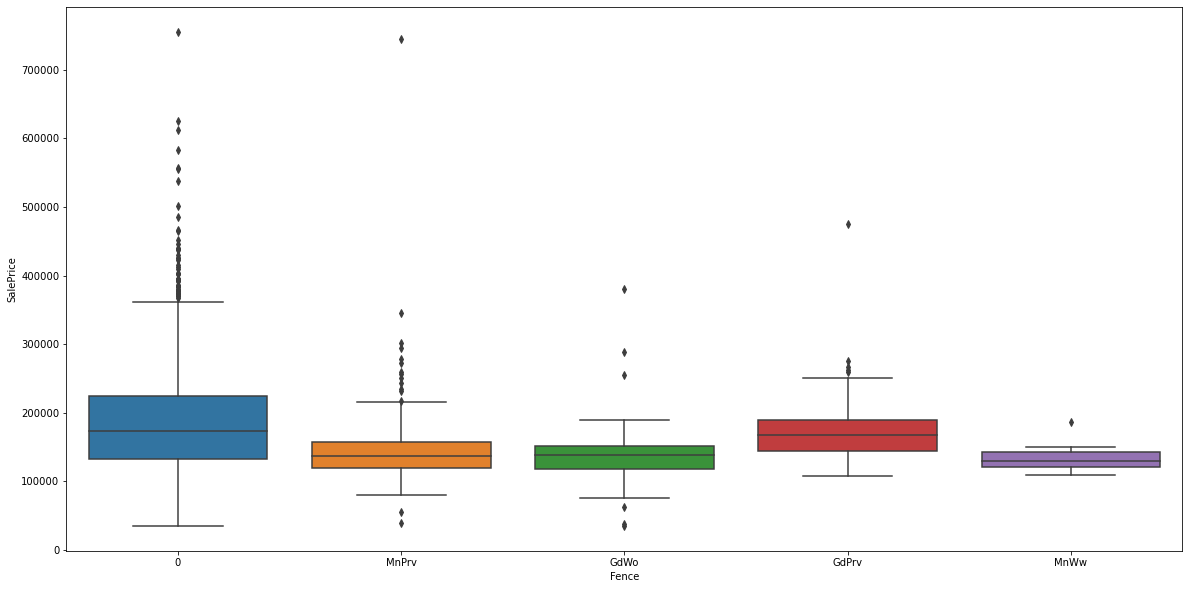

In [292]:
# based on the belwo graphs Fence and Misc Features are poorly correlated with Sale Price 
#So I am gpoing to drop them from the Dataset

fig, ax = pyplot.subplots(figsize=(20,10))
sns.boxplot(x=Df_train['Fence'], y=Df_train['SalePrice'])


<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

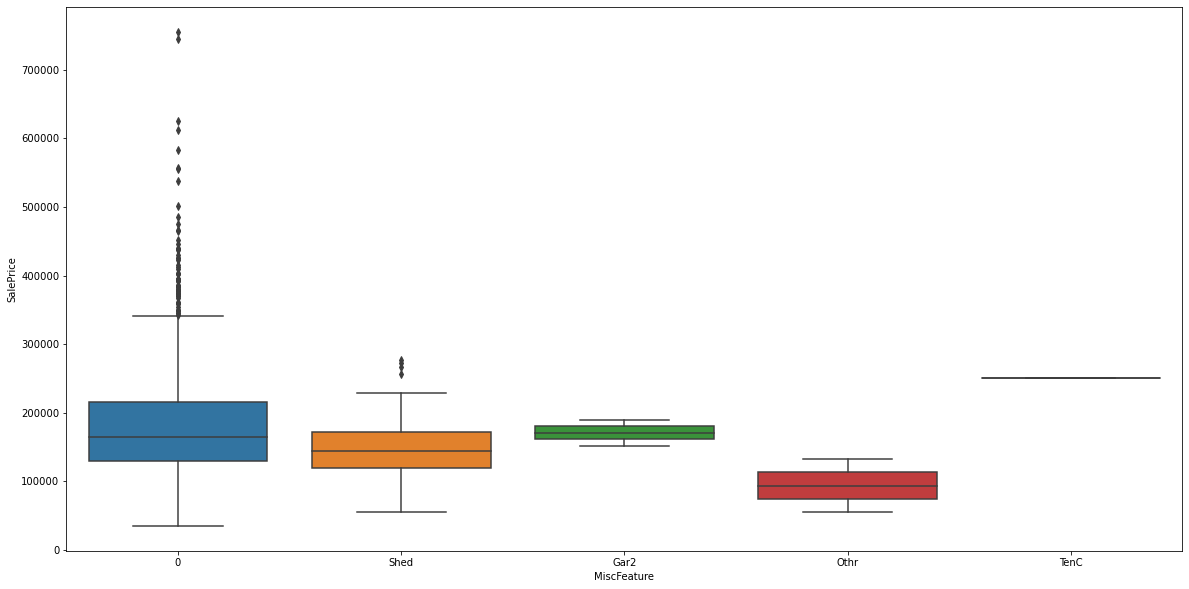

In [293]:
fig, ax = pyplot.subplots(figsize=(20,10))
sns.boxplot(x=Df_train['MiscFeature'], y=Df_train['SalePrice'])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

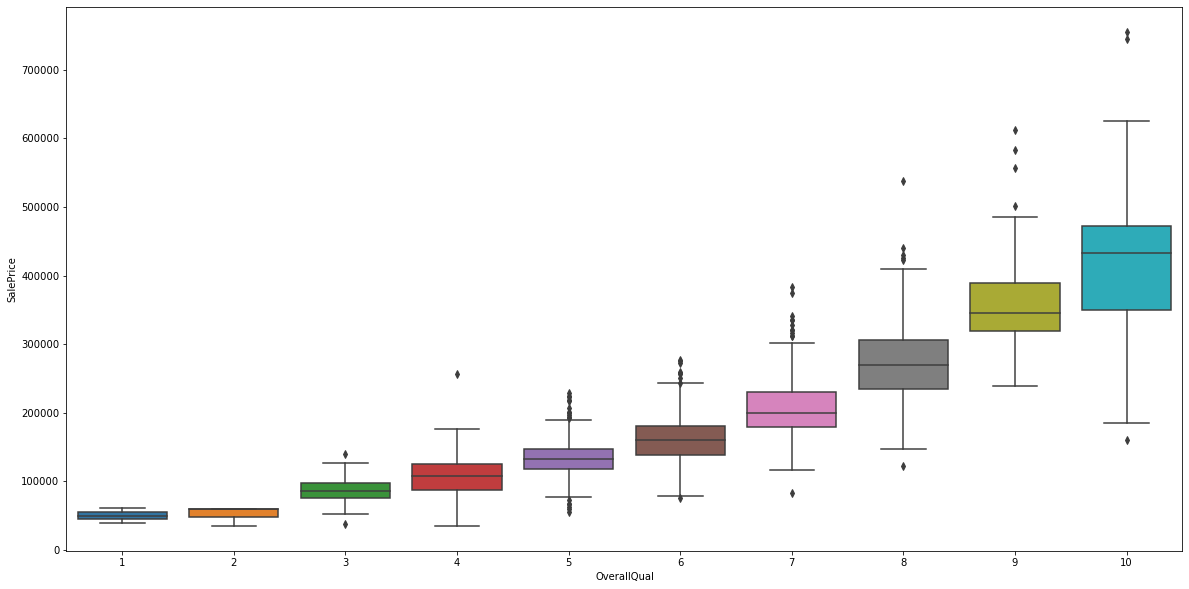

In [294]:
# exploring the corrolation between Sale Price and a few variables

fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(x=Df_train['OverallQual'], y=Df_train['SalePrice'])


<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

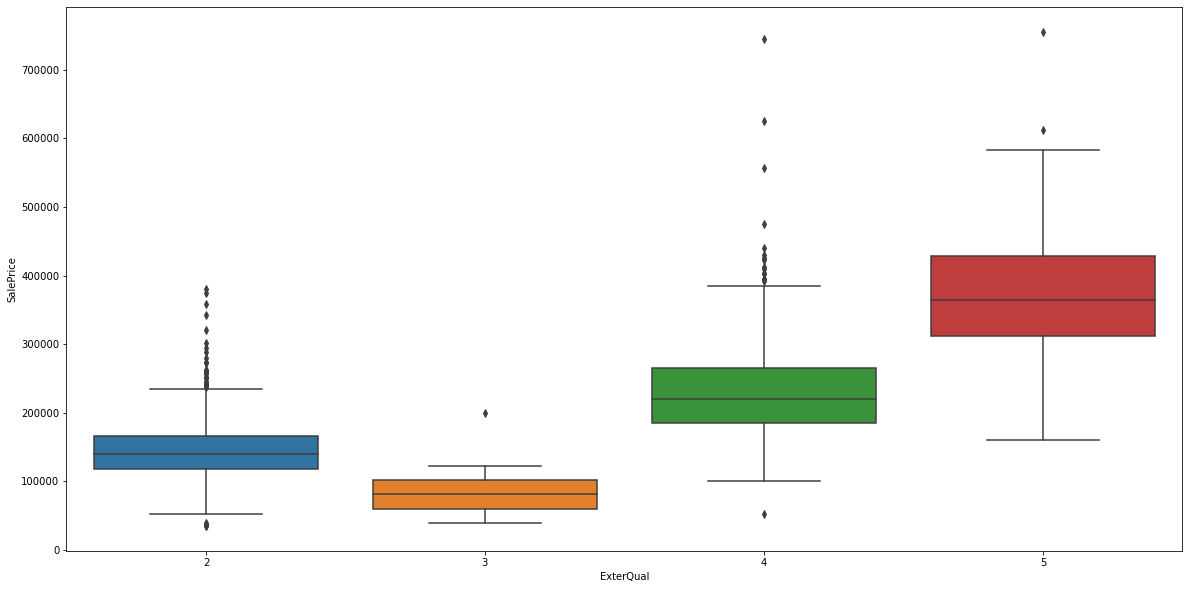

In [295]:
fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(x=Df_train['ExterQual'], y=Df_train['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

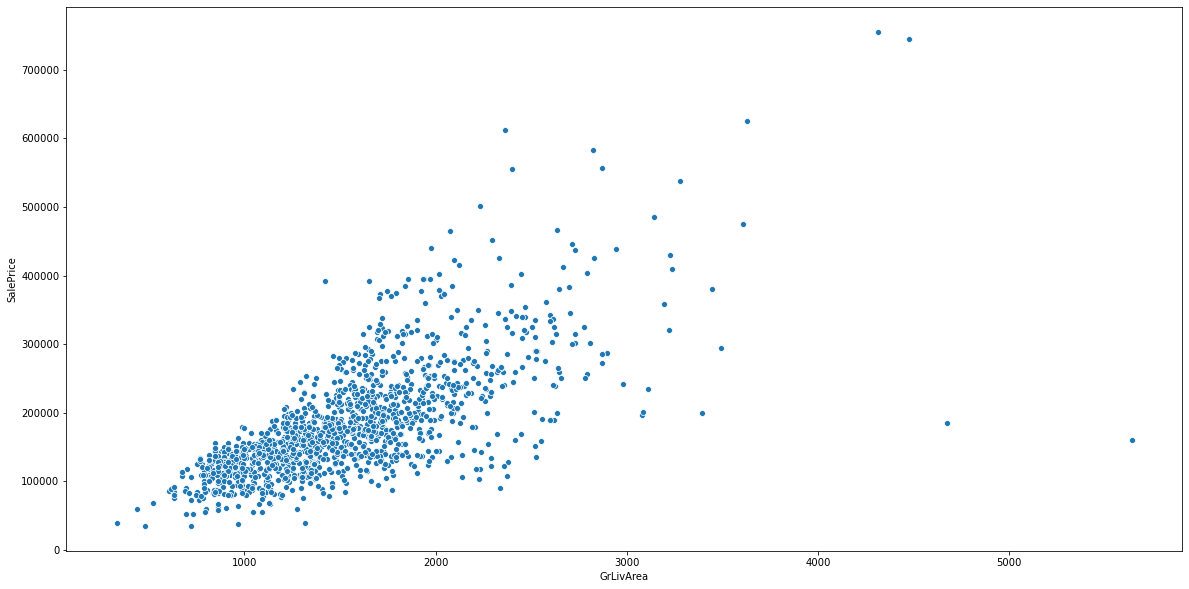

In [296]:
fig, ax = pyplot.subplots(figsize=(20,10))
sns.scatterplot(x=Df_train['GrLivArea'], y=Df_train['SalePrice'])

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

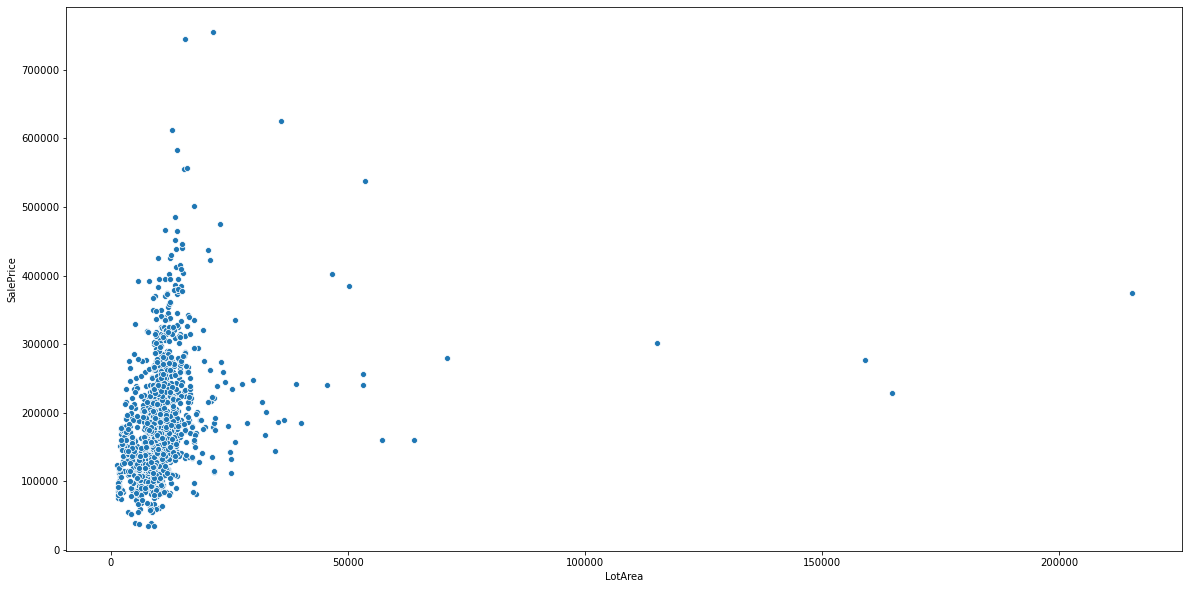

In [297]:
fig, ax = pyplot.subplots(figsize=(20,10))
sns.scatterplot(x=Df_train['LotArea'], y=Df_train['SalePrice'])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

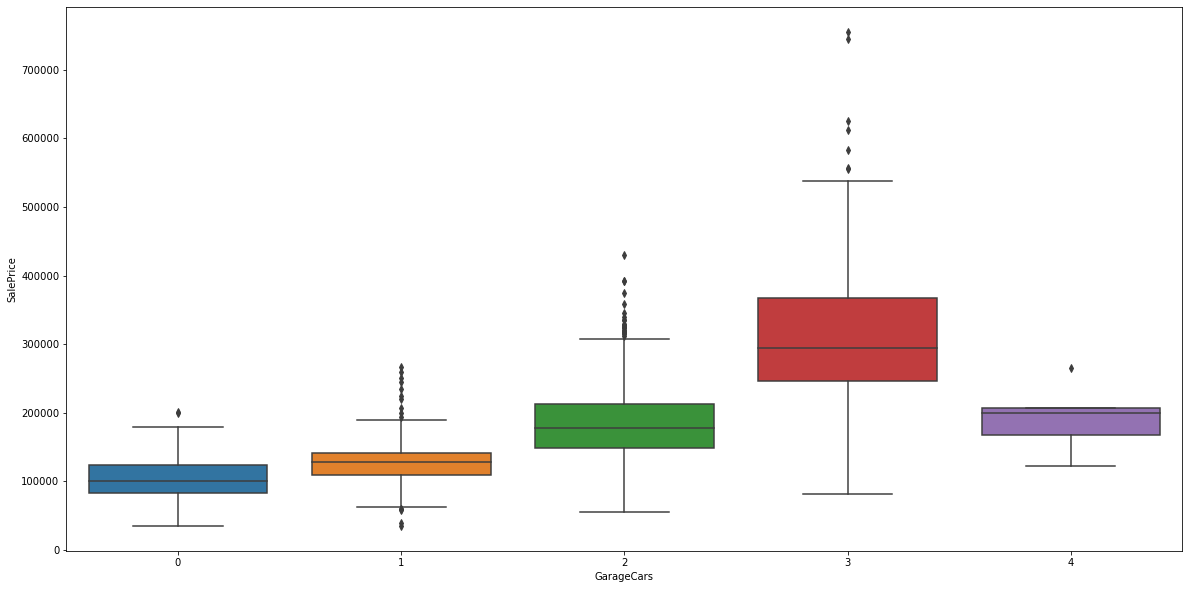

In [299]:
fig, ax = pyplot.subplots(figsize=(20,10))
sns.boxplot(x=Df_train['GarageCars'], y=Df_train['SalePrice'])

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

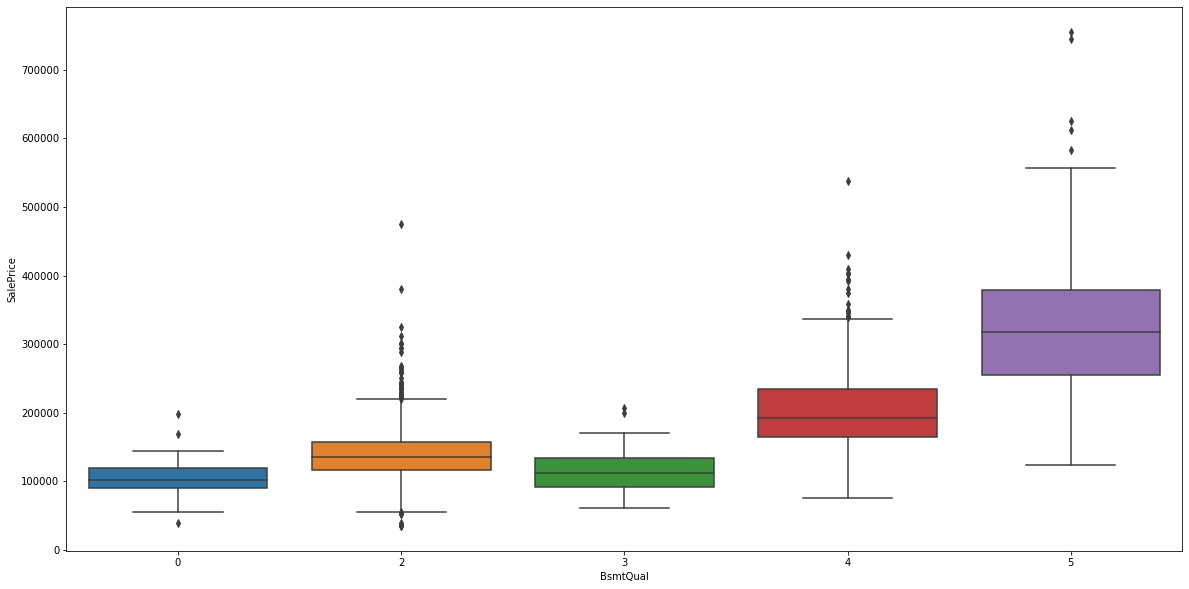

In [300]:
fig, ax = pyplot.subplots(figsize=(20,10))
sns.boxplot(x=Df_train['BsmtQual'], y=Df_train['SalePrice'])

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

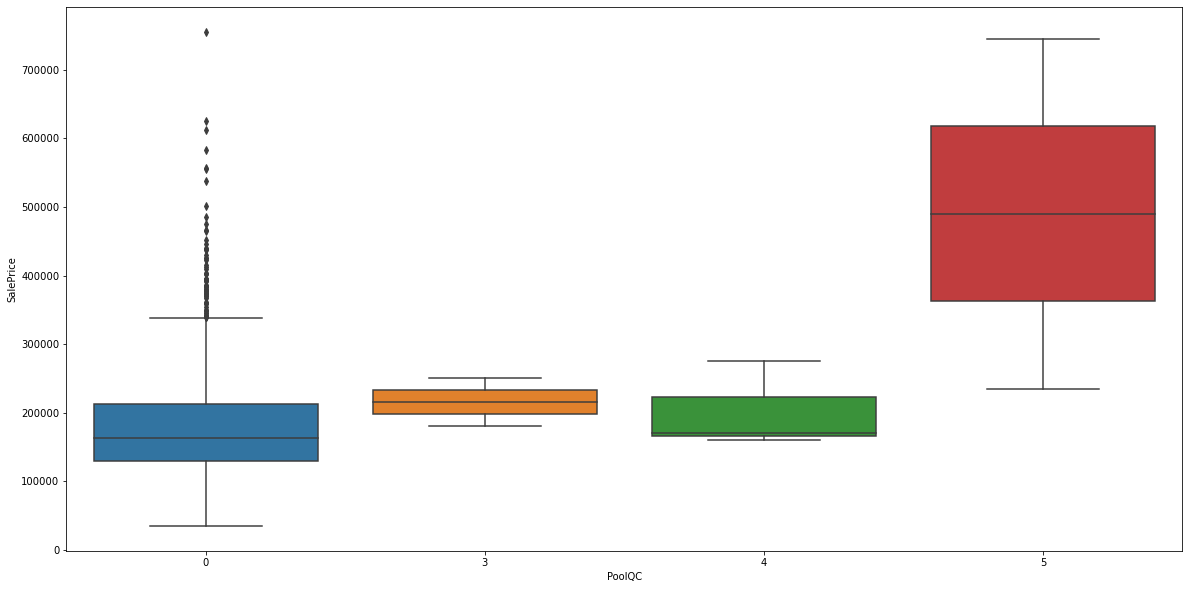

In [301]:
fig, ax = pyplot.subplots(figsize=(20,10))
sns.boxplot(x=Df_train['PoolQC'], y=Df_train['SalePrice'])

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

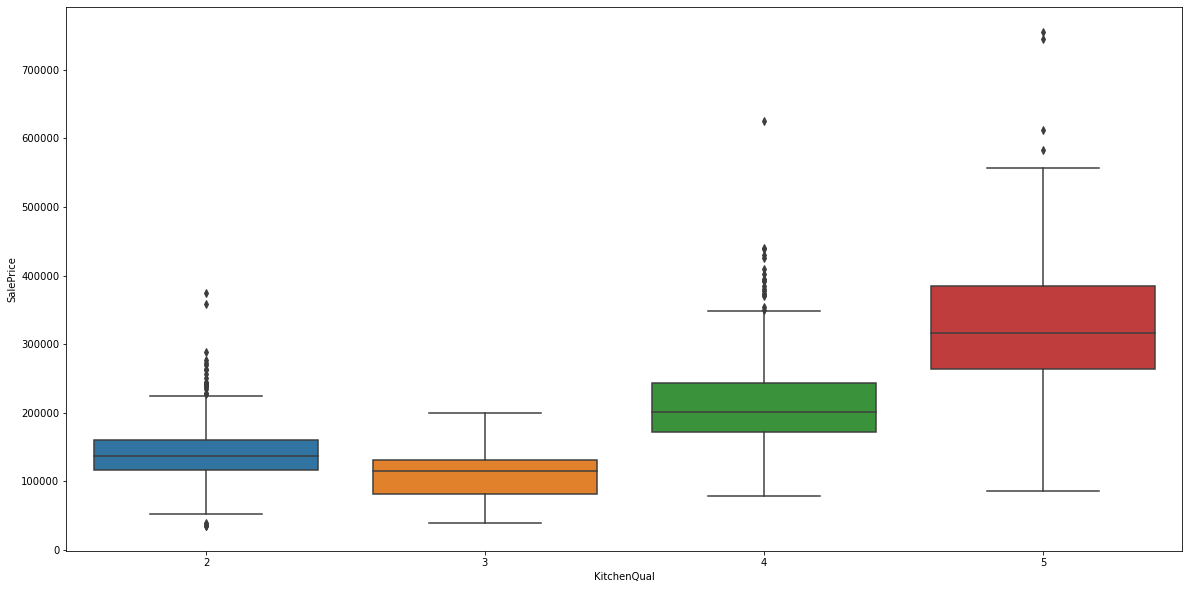

In [302]:
fig, ax = pyplot.subplots(figsize=(20,10))
sns.boxplot(x=Df_train['KitchenQual'], y=Df_train['SalePrice'])

In [175]:
# Determination of a threshold to drop correlated features

y= Df_train['SalePrice']
Df_train=Df_train.drop (['Fence', 'MiscFeature', 'SalePrice'], axis=1)
import scipy
from scipy import stats
#Identification of Corrolated Features
columns= Df_train.columns
collin=[]
feats=[]
for col1 in columns:
    for col2 in columns:
         if col1!=col2:
            corr,_=scipy.stats.spearmanr(Df_train[col1], Df_train[col2])
            if abs(corr)>=0.8:
               collin.append(corr)
               feats.append(col1)
print('features that can be dropped:') 
print(*feats, sep = ", ")
      

features that can be dropped:
YearBuilt, Exterior1st, Exterior2nd, BsmtFinType2, BsmtFinSF2, TotalBsmtSF, 1stFlrSF, GrLivArea, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageYrBlt, GarageCars, GarageArea, PoolArea, PoolQC


In [176]:
Df_train.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,1.000000,0.011156,-0.011949,-0.019761,-0.033226,-0.008916,-0.000293,-0.024071,0.014769,0.013324,...,0.002889,-0.046635,0.001330,0.057044,0.049819,-0.006242,0.021172,0.000712,-0.016932,-0.017712
MSSubClass,0.011156,1.000000,0.286937,-0.215023,-0.139781,0.024969,0.179144,-0.115361,-0.018947,-0.022844,...,-0.012037,-0.043825,-0.026030,0.008283,0.011628,-0.007683,-0.013585,-0.021407,0.012874,-0.015047
MSZoning,-0.011949,0.286937,1.000000,-0.088837,-0.161640,0.039678,0.399270,-0.167918,-0.013396,-0.011167,...,0.075025,-0.045145,-0.067541,-0.029301,-0.029090,-0.021573,0.022231,-0.010621,0.058948,0.068705
LotFrontage,-0.019761,-0.215023,-0.088837,1.000000,0.100739,0.025107,-0.056545,-0.113294,0.041865,-0.043535,...,0.027366,0.023499,0.022969,0.114106,0.146655,-0.059606,0.018942,-0.012094,0.056996,0.127482
LotArea,-0.033226,-0.139781,-0.161640,0.100739,1.000000,0.197131,-0.083668,0.315484,0.258792,0.010123,...,-0.018340,0.020423,0.043160,0.077672,0.089111,0.038068,0.001205,-0.014261,-0.013882,0.000199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,-0.006242,-0.007683,-0.021573,-0.059606,0.038068,0.022733,-0.010545,0.028638,-0.014892,-0.002296,...,0.018361,0.000354,0.031946,0.029669,0.023485,1.000000,-0.006495,0.004906,-0.014143,-0.032655
MoSold,0.021172,-0.013585,0.022231,0.018942,0.001205,-0.003690,-0.021453,0.026617,0.063280,-0.051552,...,-0.028887,0.029474,0.023217,-0.033737,-0.035158,-0.006495,1.000000,-0.145721,0.040201,0.054679
YrSold,0.000712,-0.021407,-0.010621,-0.012094,-0.014261,0.025043,-0.012036,-0.037391,-0.026117,0.023353,...,-0.009916,0.018645,0.010694,-0.059689,-0.054744,0.004906,-0.145721,1.000000,-0.021683,-0.123720
SaleType,-0.016932,0.012874,0.058948,0.056996,-0.013882,0.021171,-0.000025,0.001435,-0.014537,0.057455,...,-0.009259,-0.002600,-0.029731,-0.009887,-0.007807,-0.014143,0.040201,-0.021683,1.000000,0.232149


In [177]:
xgb_model= xgb.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.07, max_depth= 6, min_child_weight= 4, n_estimators= 500, nthread= 4, objective= 'reg:linear', silent= 1,subsample= 0.7, seed=123)

In [178]:

X= Df_train.drop(['Id','YearBuilt', 'Exterior1st', 'Exterior2nd', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PoolArea', 'PoolQC'], axis=1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [179]:
xgb_model = xgb.XGBRegressor()

In [180]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [181]:
xgb_grid = GridSearchCV(xgb_model,
                        parameters,
                        cv = 4,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  36 out of  36 | elapsed:   41.0s finished


0.824584091753938
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [219]:
xgb_model= xgb.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth=5, min_child_weight= 4, n_estimators= 500, nthread= 4, objective= 'reg:linear', silent= 1,subsample= 0.7, seed=123)

In [220]:
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
#Scale y_pred
#y_preds = robust_scaler.fit_transform(y_pred.reshape(-1,1))
#y_tests=robust_scaler.fit_transform(y_test.reshape(-1,1))
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 26751.435429


In [221]:
# compute Rsquare and adjusted R spuare with formulas from the theory

SS_Residual = np.sum(np.square(y_test-y_pred)) 
print("SS residual: %f" % SS_Residual)
SS_Total = sum((y_test-np.mean(y_test))**2)
print("SS Total: %f" % SS_Total)
r_squared =1 - (SS_Residual)/SS_Total
print("r_squared: %f" % r_squared)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
                                                    
print ("adjusted_r_squared: %f" % adjusted_r_squared)

SS residual: 208966674877.259460
SS Total: 1804447575657.078369
r_squared: 0.884194
adjusted_r_squared: 0.853480


15


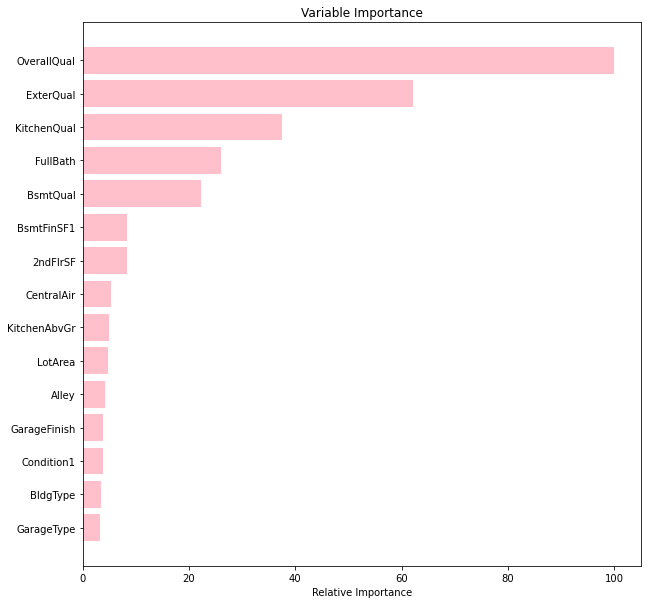

In [222]:
feature_importance = xgb_model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:70]
sorted_idx = np.argsort(feature_importance)[-15:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)

plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='pink')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [186]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [187]:

# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor() 

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regressor_random.fit(X_train, y_train)
regressor_random.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.9min finished


{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [223]:
#Comparing the improvement made through usimg the best estimators after Randomzed search 

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = regressor_random.best_estimator_
random_accuracy = evaluate(best_random,  X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 20900.0623 degrees.
Accuracy = 88.24%.
Model Performance
Average Error: 16961.5212 degrees.
Accuracy = 90.31%.
Improvement of 2.35%.


In [224]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
best_regressor=RandomForestRegressor (n_estimators= 1600,min_samples_split=5,min_samples_leaf= 1,max_features= 'sqrt', max_depth=70, bootstrap= False)
best_regressor.fit(X_train, y_train)
y_pred_rf=best_regressor.predict(X_test)

rmse = np.sqrt(MSE(y_test, y_pred_rf))
print("RMSE: %f" % (rmse))

RMSE: 28303.840234


In [225]:
#Compute Rsquare and adjusted R spuare with formulas from the theory

SS_Residual = np.sum(np.square(y_test-y_pred_rf)) 
print("SS residual: %f" % SS_Residual)
SS_Total = sum((y_test-np.mean(y_test))**2)
print("SS Total: %f" % SS_Total)
r_squared =1 - (SS_Residual)/SS_Total
print("r_squared: %f" % r_squared)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
                                           
                                        
print ("adjusted_r_squared: %f" % adjusted_r_squared)

SS residual: 233923352624.060333
SS Total: 1804447575657.078369
r_squared: 0.870363
adjusted_r_squared: 0.835981


15


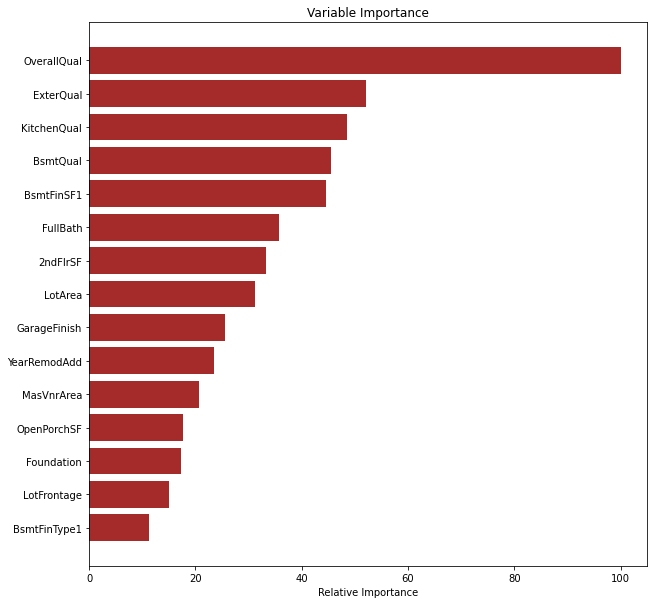

In [226]:
feature_importance =best_regressor.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:70]
sorted_idx = np.argsort(feature_importance)[-15:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center',color='brown')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [194]:
from sklearn.linear_model import Ridge

from numpy import arange

In [195]:
# to hypertune parameters 
model = Ridge()
# define parameters
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
# define search
Ridge_GS  = GridSearchCV(model, param_grid=params_Ridge,  cv=5, n_jobs=-1)
# perform the search
Ridge_GS .fit(X_train, y_train)
# best estimator
Ridge_GS .best_estimator_
# summarize



Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [212]:
Ridgeregression = Ridge(random_state=3, **Ridge_GS .best_params_)
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=Ridgeregression, X=X_train, y=y_train, cv=5)
all_accuracies
print(all_accuracies.mean())

0.7265362072117985


In [216]:
# fit the model
Ridgeregression.fit(X_train, y_train)
print(Ridgeregression.coef_)
y_pred_ridge = Ridgeregression.predict(X_test)

[-2.18845722e+02 -2.12140954e+03 -4.24310945e+00  6.26795625e-01
 -2.65143122e+04 -2.45830829e+03  1.06475617e+03  2.41955470e+03
 -3.22745058e+04  2.27386290e+03  1.03173170e+04 -5.36412545e+00
 -2.20206274e+03 -4.17693125e+03 -1.69123901e+02  9.72094115e+02
  1.78762546e+04  4.19095533e+03 -9.65261621e+00  1.22340331e+04
 -1.59178682e+04  5.87392550e+03  4.56142961e+01  6.64916495e+03
 -2.28354970e+03  3.42546343e+02  3.70995377e+03 -3.95300066e+03
  3.75777009e+03  6.65928788e+02  3.80812574e+01  2.75130393e+01
 -5.04737658e+02  5.67724222e+02  5.07117217e+02  2.53653430e+03
  3.40327461e+01 -2.57483338e+00  9.99233599e+03  6.51904171e+03
  1.54085074e+04  4.72504323e+03 -8.71244320e+02  6.47234374e+03
  6.35726120e+03  3.72807862e+02  1.31253939e+03  3.39399203e+03
  1.78795242e+03  2.19604272e+02  7.81530341e+03  3.50225478e+01
  2.46519826e+01 -4.89169974e+00  2.35486207e+01  5.84048259e+01
 -2.27603250e+00 -3.34205758e+02 -1.17577668e+03  2.64398592e+03
  1.21086961e+03]


In [214]:
 #Compute Rsquare and adjusted R spuare with formulas from the theory

SS_Residual = np.sum(np.square(y_test-y_pred_ridge)) 
print("SS residual: %f" % SS_Residual)
SS_Total = sum((y_test-np.mean(y_test))**2)
print("SS Total: %f" % SS_Total)
r_squared =1 - (SS_Residual)/SS_Total
print("r_squared: %f" % r_squared)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
                                           
                                        
print ("adjusted_r_squared: %f" % adjusted_r_squared)

SS residual: 324361663402.908813
SS Total: 1804447575657.078369
r_squared: 0.820243
adjusted_r_squared: 0.772569
